In [2]:
import os
import numpy as np

from numpy.polynomial import Polynomial


import matplotlib.pyplot as plt

In [3]:
calib_dict = {'10': 0.04,
              '20': 0.2,
              '30': 0.5,
              '40': 0.9,
              '50': 1.4,
              '60': 2.1,
              '70': 2.75,
              '75': 3.1,
              '80': 3.5,
              '85': 3.8,
              '90': 4.0,
              '95': 4.3,
              '100':4.5}
size_px = 0.196 # in mm2

[0.20408163265306123, 1.0204081632653061, 2.5510204081632653, 4.591836734693877, 7.142857142857142, 10.714285714285714, 14.03061224489796, 15.816326530612244, 17.857142857142858, 19.387755102040813, 20.408163265306122, 21.93877551020408, 22.959183673469386]


Text(0, 0.5, 'Light intensity - mW/mm2 ')

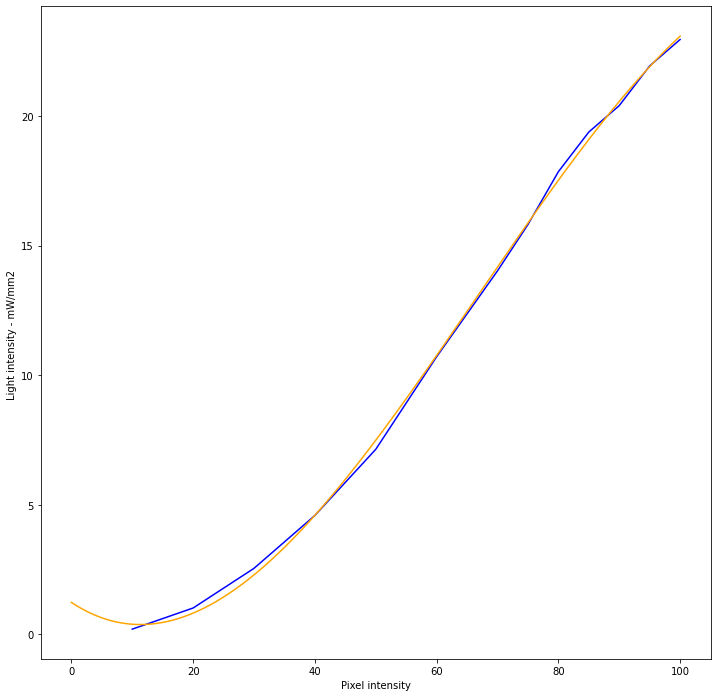

In [4]:
# Find a polynomial fit for the power function
plt.figure(figsize=(12, 12))

data_pts = [int(k) for k in calib_dict]
powers = [v/0.196 for v in calib_dict.values()]

print(powers)

poly = Polynomial.fit(data_pts, powers, 3)
x = np.linspace(0, 100, 1000)
y = poly(x)

plt.plot(data_pts, powers, color='b')
plt.plot(x, y, color='orange')

plt.xlabel('Pixel intensity')
plt.ylabel('Light intensity - mW/mm2 ')

In [5]:
# Find closest value of image and convert it
# Set the minimum for optogenetic activation (may need to be determined from neurometrics)
min_acti = 10

root = '/home/anverdie/Aymard Batch/stims_AM/'
paths = [os.path.join(root, p) for p in os.listdir(root)]

for path in paths:
    img = np.load(path) / 255 # Convert from bmp
    active_units = img[img != 0] # Only compute active units
    active_units = min_acti + active_units * (np.max(powers) - min_acti) # Normalize
    idx_powers = [np.argmin(np.abs(y - a)) for a in active_units]
    img[img != 0] = x[idx_powers] * 2.55
    np.save(os.path.basename(path), img)